In [5]:
%load_ext line_profiler
%load_ext autoreload
%autoreload 2

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import os
import cv2
import shutil
from opencv_approach import *
from tqdm import tqdm
from glob import glob

In [7]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "./vision_api.json"

In [8]:
ts = TransparentShadow()

In [6]:
bgg = Image.new("RGB", (600,600), color=(255,255,255))

CPU times: user 373 ms, sys: 15.7 ms, total: 389 ms
Wall time: 1.44 s


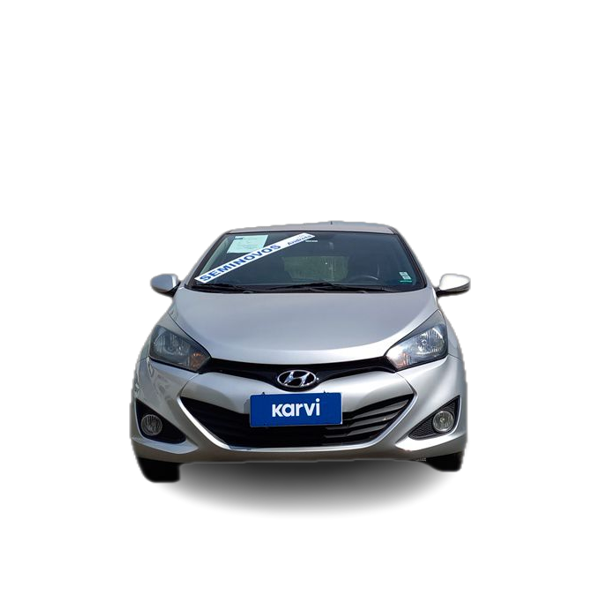

In [7]:
%%time
f = ""
image = Image.open(f)
img = np.array(image)#[:,::-1]
image = Image.fromarray(img)
o, _ = ts.process_image(img)

shad = Image.fromarray(255-o[...,-1])
imout = image.copy()
imout.paste(Image.new('RGB', shad.size), (0,0), shad)
imout.paste(image, (0,0), image)
bg = bgg.copy()
imout = imout.crop(imout.getbbox())
imout.thumbnail((bg.size[0]-30,300))
w,h = imout.size
px = bg.size[0]//2 - w//2
bg.paste(imout, (px,520-h), imout)
bg

In [10]:
from concurrent.futures import ThreadPoolExecutor, as_completed

In [14]:
# %%time

def make_call(f):
    outf = f"data/biglabel/{f.split('/')[-1]}"
    if os.path.exists(outf):
        return
    image = Image.open(f)
    img = np.array(image)
    try:
        o, _ = ts.process_image(img)
    except AssertionError:
        print(f)
        return

    shad = Image.fromarray(o[...,-1])
    shad.save(outf)
#     imout = image.copy()
#     imout.paste(Image.new('RGB', shad.size), (0,0), shad)
#     imout.paste(image, (0,0), image)
#     bg = bgg.copy()
#     imout = imout.crop(imout.getbbox())
#     imout.thumbnail((bg.size[0]-50,300))
#     w,h = imout.size
#     px = bg.size[0]//2 - w//2
#     bg.paste(imout, (px,520-h), imout)
#     bg.save(outf)

futs = []
with ThreadPoolExecutor(5) as exe:
    for f in tqdm(glob("data/bigdatarmbg/*")):
        futs.append(exe.submit(make_call, f))
    for _ in tqdm(as_completed(futs), total=len(futs)):
        pass

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13320/13320 [00:00<00:00, 16858.77it/s]


SyntaxError: invalid syntax (1982193800.py, line 1)